# Notebook 01 – Data Exploration

Ce notebook a pour objectif d'explorer les données du challenge **IEEE-CIS Fraud Detection**.  
Nous allons analyser la distribution des variables, identifier les corrélations et préparer le terrain pour la modélisation.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Chargement des données
- Charger train_transaction.csv et train_identity.csv.
- Fusionner sur TransactionID.

In [9]:
# charger les données et fusionner les dataframes

df_train_transaction = pd.read_csv('../Data/train_transaction.csv')
df_train_identity = pd.read_csv('../Data/train_identity.csv')
df_train = df_train_transaction.merge(df_train_identity,on=['TransactionID'],how='left')
df_test_transaction = pd.read_csv('../Data/test_transaction.csv')
df_test_identity = pd.read_csv('../Data/test_identity.csv')

#some columns (id) are wrongly labeled in test_identity. We will correct it
id_cols = [col for col in df_test_identity.columns if col[0]+col[1] == 'id']
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}
df_test_identity = df_test_identity.rename(columns=rename_cols)
df_test = df_test_transaction.merge(df_test_identity,on=['TransactionID'],how='left')
df_train.to_csv('../Data/train_combined.csv',index=False)
df_test.to_csv('../Data/test_combined.csv',index=False)

### Chargeons maintenant les fichiers enregistrés


In [22]:
df_train = pd.read_csv('../Data/train_combined.csv')
df_test = pd.read_csv('../Data/test_combined.csv')
print(df_train.shape)
print(df_test.shape)

(590540, 434)
(506691, 433)


In [23]:
def compare_columns(df_train, df_test):
    # Colonnes présentes uniquement dans df_train
    only_in_train = set(df_train.columns) - set(df_test.columns)
    
    # Colonnes présentes uniquement dans df_test
    only_in_test = set(df_test.columns) - set(df_train.columns)
    
    # Résumé
    print("Colonnes uniquement dans df_train :", len(only_in_train))
    print(only_in_train)
    print("\nColonnes uniquement dans df_test :", len(only_in_test))
    print(only_in_test)
    
    return only_in_train, only_in_test


In [24]:
compare_columns(df_train, df_test)

Colonnes uniquement dans df_train : 1
{'isFraud'}

Colonnes uniquement dans df_test : 0
set()


({'isFraud'}, set())

Appercu des données manquantes


In [25]:
def missing_cols(df, n=10, thresh=80):
    """
    Renvoie les colonnes manquantes dans le dataframe avec des valeurs manquantes de pourcentage > thresh. Si n = Aucun, le dataframe complet sera renvoyé avec des valeurs manquantes de pourcentage > thresh.
    
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'Il y a {df.isnull().any().sum()} colonnes dans cet ensemble de données avec des valeurs manquantes.')
    print(f'Il y a {dff[dff["missing_percent"] > thresh].shape[0]} colonnes avec des valeurs manquantes supérieures à {thresh}%')
    if n:
        return dff.head(n)
    else:
        return dff

In [26]:
missing_cols(df_train, thresh=90)

Il y a 414 colonnes dans cet ensemble de données avec des valeurs manquantes.
Il y a 12 colonnes avec des valeurs manquantes supérieures à 90%


,col,missing_percent
0,id_24,99.196159
1,id_25,99.130965
2,id_07,99.127070
3,id_08,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_22,99.124699
7,id_27,99.124699
8,id_23,99.124699
9,dist2,93.628374


In [15]:
missing_cols(df_test, thresh=90)

Il y a 385 colonnes dans cet ensemble de données avec des valeurs manquantes.
Il y a 10 colonnes avec des valeurs manquantes supérieures à 90%


,col,missing_percent
0,id_24,99.064519
1,id_25,99.005508
2,id_26,99.003929
3,id_21,99.001561
4,id_08,99.001561
5,id_07,99.001561
6,id_27,99.000969
7,id_23,99.000969
8,id_22,99.000969
9,dist2,92.809030


In [17]:
def delete_top_missing_cols(df, thresh=90):
    """
    Supprime les colonnes avec des valeurs manquantes de pourcentage > thresh.
    
    """
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    cols_to_drop = dff[dff['missing_percent'] > thresh]['col'].values
    df = df.drop(columns=cols_to_drop)
    return df

In [20]:
df_train = delete_top_missing_cols(df_train, thresh=90)
df_test = delete_top_missing_cols(df_test, thresh=90)

In [21]:
missing_cols(df_train, n=20, thresh=90)
missing_cols(df_test, n=20, thresh=90)

Il y a 402 colonnes dans cet ensemble de données avec des valeurs manquantes.
Il y a 0 colonnes avec des valeurs manquantes supérieures à 90%
Il y a 375 colonnes dans cet ensemble de données avec des valeurs manquantes.
Il y a 0 colonnes avec des valeurs manquantes supérieures à 90%


,col,missing_percent
0,id_18,89.959364
1,D7,88.132215
2,id_04,86.879380
3,id_03,86.879380
4,D12,86.332104
5,id_30,86.054814
6,id_32,86.052446
7,id_33,86.052446
8,id_14,85.917058
9,id_34,85.755618


Il y a 414 colonnes dans cet ensemble de données avec des valeurs manquantes.
Il y a 414 colonnes avec des valeurs manquantes supérieures à 0%


In [15]:
cols.shape

(435, 2)

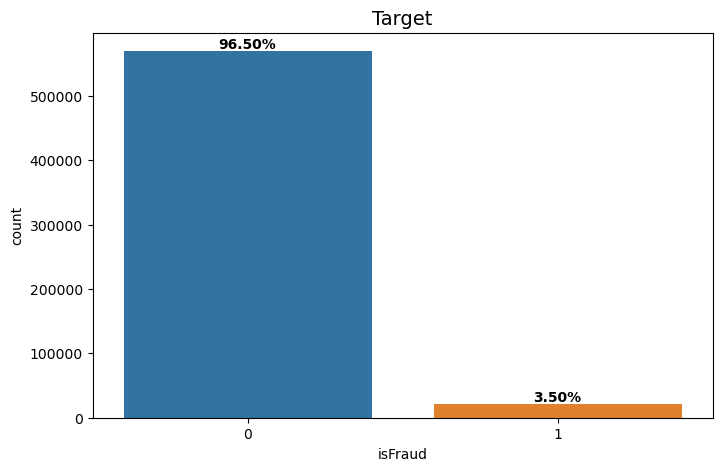

In [8]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    x="isFraud", 
    data=df_train, 
    hue="isFraud",              # on utilise hue sur la même colonne
    palette=['#1f77b4','#ff7f0e'],
    legend=False                # on désactive la légende inutile
)

# Ajouter les pourcentages
counts = df_train['isFraud'].value_counts(normalize=True).sort_index() * 100
for p, perc in zip(ax.patches, counts):
    ax.annotate(f'{perc:.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Target', fontsize=14)
plt.ylabel('count')
plt.xlabel('isFraud')
plt.show()

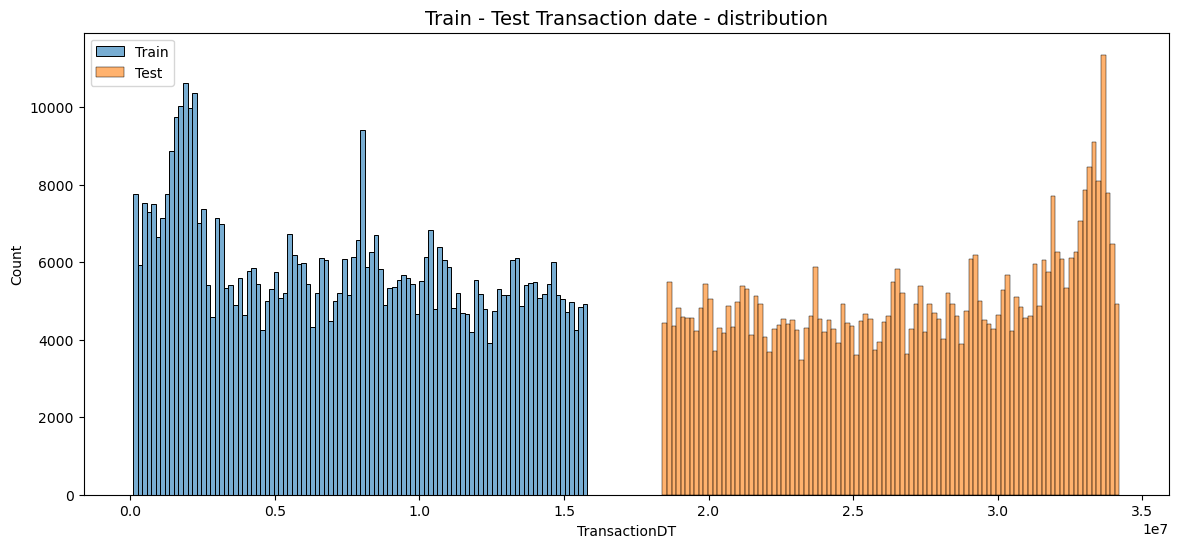

In [11]:
plt.figure(figsize=(14,6))

# Train
sns.histplot(df_train['TransactionDT'], bins=100, color='#1f77b4', label='Train', alpha=0.6)

# Test
sns.histplot(df_test['TransactionDT'], bins=100, color='#ff7f0e', label='Test', alpha=0.6)

plt.title('Train - Test Transaction date - distribution', fontsize=14)
plt.xlabel('TransactionDT')
plt.ylabel('Count')
plt.legend()
plt.show()